# Classify the Categories of CIFAR10 dataset, Using CNN

In [1]:
# The keras library is used for building and training deep learning models
import keras
import numpy as np
# The cifar10 module from the keras.datasets package contains the CIFAR-10 dataset, which is a collection of 60,000 32x32 color images
# in 10 classes, with 6,000 images per class. T
# he dataset is divided into 50,000 training images and 10,000 testing images.
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2


In [2]:
# Load the CIFAR-10 dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
# Print the shape of the training images array
# Number of samples, Height, Width, Number of channels
print("train images:", train_images.shape)
print("train labels:", train_labels.shape)
print("test images:", test_images.shape)
print("test labels:", test_labels.shape)

train images: (50000, 32, 32, 3)
train labels: (50000, 1)
test images: (10000, 32, 32, 3)
test labels: (10000, 1)


In [4]:
# This dictionary maps a numerical label to an object class name.
classes = {
  6 : 'frog',
  9 : 'truck',
  4 : 'deer',
  1 : 'automobile',
  2 : 'bird',
  7 : 'horse',
  8 : 'ship',
  3 : 'cat',
  5 : 'dog',
  0 : 'airplane'
}

Text(0.5, 1.0, 'ship')

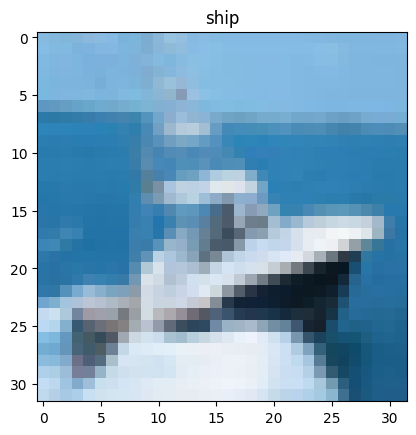

In [5]:
plt.imshow(train_images[8])
plt.title(classes[int(train_labels[8][0])])


# CNN

CNN stands for Convolutional Neural Network. It is a type of deep learning algorithm designed for processing and analyzing visual data, such as images or videos. CNNs are widely used in computer vision tasks like image classification, object detection, and image segmentation.

The key feature of CNNs is their ability to automatically learn hierarchical representations of data. This allows them to capture complex patterns and relationships within the input images. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

Convolutional layers are the core building blocks of CNNs. They perform a series of convolutions on the input image using learnable filters or kernels. Each filter extracts different features from the image by sliding over its spatial dimensions and producing a feature map.

Pooling layers are used to downsample the feature maps obtained from the convolutional layers. They reduce the spatial dimensions while retaining the most important information. Common pooling operations include max pooling and average pooling.

Fully connected layers are responsible for making final predictions based on the extracted features. They take the output of the previous layers and connect every neuron to every output neuron, allowing the network to learn complex non-linear relationships.

During the training phase, CNNs learn to optimize their internal parameters (weights and biases) through a process called backpropagation. This involves iteratively adjusting the parameters to minimize an objective function, typically achieved using optimization algorithms like stochastic gradient descent (SGD).

CNNs have revolutionized many fields, including image recognition, autonomous driving, medical imaging, and natural language processing. Their ability to automatically extract relevant features makes them highly effective in various tasks that involve visual data analysis.

#  Preprocessing in CNN neural networks


Preprocessing plays a crucial role in the training of Convolutional Neural Networks (CNNs). It involves transforming and preparing the input data to enhance the network's performance and improve its ability to learn meaningful features. Here are some common preprocessing steps used in CNN neural networks:

1. Rescaling: Rescaling, or normalization, is typically performed to ensure that the input data falls within a specific range. This step involves scaling the pixel values of the images to a common scale, such as [0, 1] or [-1, 1]. Rescaling helps in preventing one feature from dominating others due to differences in their scales.

2. Centering: Centering the data involves subtracting the mean value from each input image. It helps in removing any bias in the data and makes the mean of the dataset zero. Centering is often performed along with rescaling.

3. Data Augmentation: Data augmentation techniques are applied to artificially increase the size and diversity of the training dataset. Common data augmentation techniques for image data include random rotations, translations, flips, zooms, and noise addition. Data augmentation helps in reducing overfitting and improving the generalization ability of the CNN model.

4. Image Cropping and Resizing: Images in a dataset may have different sizes. In order to feed them into a CNN model, they need to be resized to a fixed size. This step involves either cropping or resizing the images while preserving their aspect ratio. Cropping can be used when there is sufficient context in the image, and resizing can be used when the entire image content is important.

5. Image Preprocessing Techniques: Various image preprocessing techniques can be applied to enhance the quality and clarity of the images. These techniques may include grayscale conversion, histogram equalization, edge detection, or denoising filters. The choice of preprocessing techniques depends on the specific problem domain and the characteristics of the input data.

6. Handling Missing Data or Outliers: If your dataset contains missing data or outliers, appropriate preprocessing steps should be taken. Missing data can be handled by imputation techniques such as mean or median imputation, while outliers can be treated by removing or replacing them with more reasonable values.

7. One-Hot Encoding: If the CNN model requires categorical variables as input, one-hot encoding can be applied to convert these categorical variables into a binary vector representation. Each category is represented by a binary variable, where only one element in the vector is set as 1 and others are 0.

It's important to note that the choice of preprocessing steps may vary depending on the specific problem domain and the characteristics of the input data. Experimentation and domain knowledge are often required to determine the most effective preprocessing techniques for a given task.

In [6]:
train_images[0].shape

(32, 32, 3)

In [7]:
# Convert the data type of train and test images to 'float32' and normalize the pixel values between 0 and 1
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [8]:
# One hot encoding of the target variable

# Convert train labels to one hot encoded vectors
train_labels = keras.utils.to_categorical(train_labels)
# Convert test labels to one hot encoded vectors
test_labels = keras.utils.to_categorical(test_labels)

In [9]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
# Import the necessary libraries for creating a sequential model
from keras.models import Sequential
# Import the Dense and Flatten layers to be added to the model
from keras import layers

#  CNNs layers

Convolutional Neural Networks (CNNs) consist of several types of layers, each serving a specific purpose in the network's architecture:

1. Input Layer:
   The input layer represents the raw data that is fed into the CNN. In the case of image processing, the input layer receives the pixel values of an image.

2. Convolutional Layer:
   Convolutional layers are responsible for performing convolutions on the input data. Each convolutional layer consists of multiple learnable filters or kernels, which are small matrices slid over the input data to extract local features. These filters capture different patterns such as edges, textures, or shapes. The output of a convolutional layer is a set of feature maps, where each map represents the activation of a specific filter across the spatial dimensions of the input.

3. Activation Function:
   An activation function introduces non-linearity into the network. Commonly used activation functions in CNNs include Rectified Linear Unit (ReLU), sigmoid, and hyperbolic tangent (tanh). They help in modeling complex relationships between features and introduce non-linearities into the network.

4. Pooling Layer:
   Pooling layers downsample the feature maps obtained from the convolutional layers. They reduce the spatial dimensions while retaining the most important information. Max pooling is a popular pooling operation, where the maximum value within a pool size (e.g., 2x2) is chosen as the representative value. Average pooling takes the average value within the pool size.

5. Dropout Layer:
   Dropout is a regularization technique used to prevent overfitting. It randomly drops out a fraction of the neurons during each training iteration, forcing the network to learn redundant representations. This helps in improving the generalization capability of the network.

6. Fully Connected Layer:
   Fully connected layers, also known as dense layers, are responsible for making final predictions based on the extracted features. They connect every neuron from the previous layer to every neuron in the current layer, allowing the network to learn complex non-linear relationships. Typically, the last fully connected layer produces the output predictions, and the activation function used depends on the specific problem (e.g., softmax for classification tasks).

7. Softmax Layer:
   The softmax layer is often used as the final layer in classification tasks. It applies the softmax activation function, which converts a vector of real values into a probability distribution over predicted classes. Each element in the output represents the likelihood of the input belonging to a particular class.

These are the fundamental layers commonly used in CNN architectures. Depending on the complexity of the task, CNNs can have multiple stacks of convolutional layers, pooling layers, and fully connected layers. The arrangement and configuration of these layers vary depending on the specific problem and design choices.

In [11]:
# We add layers to the model
model = Sequential()

# CNN layers
# We specify the input shape of the network as 32*32 with 3 channels (RGB)
# 'same' padding means we want to preserve the spatial dimensions of the input
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


# Classification layers
# We flatten the feature maps and pass them to a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))


In [12]:
# Compiling the model with the Adam optimizer
# using categorical crossentropy loss function
# and accuracy as the evaluation metric.
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

In [13]:
# Fitting the model on the training data
# with 5 epochs and a batch size of 32.
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3780 - accuracy: 0.5112
Epoch 2/5
1563/1563 [==============================] - 138s 88ms/step - loss: 0.9725 - accuracy: 0.6639
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 0.8183 - accuracy: 0.7173
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 0.7236 - accuracy: 0.7515
Epoch 5/5
1563/1563 [==============================] - 136s 87ms/step - loss: 0.6483 - accuracy: 0.7775


In [14]:
# Printing a summary of the model's architecture,
# including the layers and their output shapes,
# as well as the total number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [15]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
# Printing the test loss and accuracy to the console
print(test_loss, test_acc)

313/313 [==============================] - 8s 25ms/step - loss: 0.7912 - accuracy: 0.7293
0.7911503911018372 0.7293000221252441


In [16]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    """
    Displays multiple images in a grid using Matplotlib subplots.

    Args:
        rows (int): Number of rows in the grid.
        columns (int): Number of columns in the grid.
        img_names (list): A list of image data to be displayed.
        vmin (float/int): Minimum value of the colormap range. Default is 0.
        vmax (float/int): Maximum value of the colormap range. Default is 255.

    Returns:
        None
    """
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

1/1 [==============================] - 0s 112ms/step
predicted as..... airplane


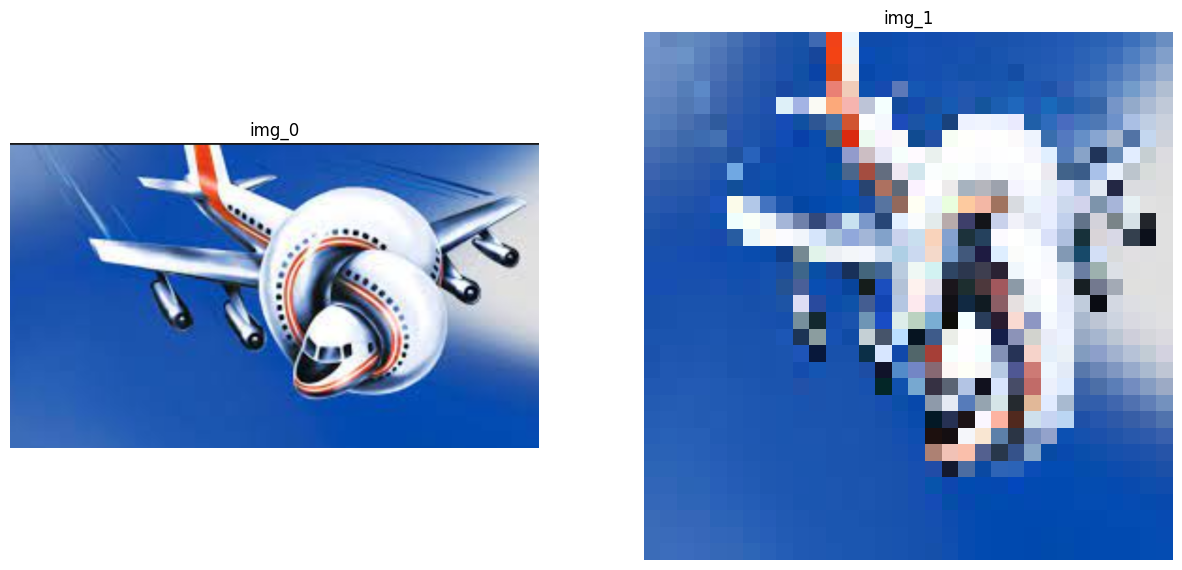

In [18]:
# Read image from the specified path and store it in img1 variable
img1 = cv2.imread('/content/drive/MyDrive/images/1.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized1 = cv2.resize(desired_image1, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized1 = desired_image_resized1.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped1 = np.expand_dims(desired_image_normalized1, axis=0)

# Use the trained model to predict the label of the input image
preds1 = model.predict(desired_image_reshaped1)

# Find the predicted label index with highest probability using argmax() function
predicted_label1 = np.argmax(preds1)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label1])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image1, desired_image_resized1))

1/1 [==============================] - 0s 29ms/step
predicted as..... airplane


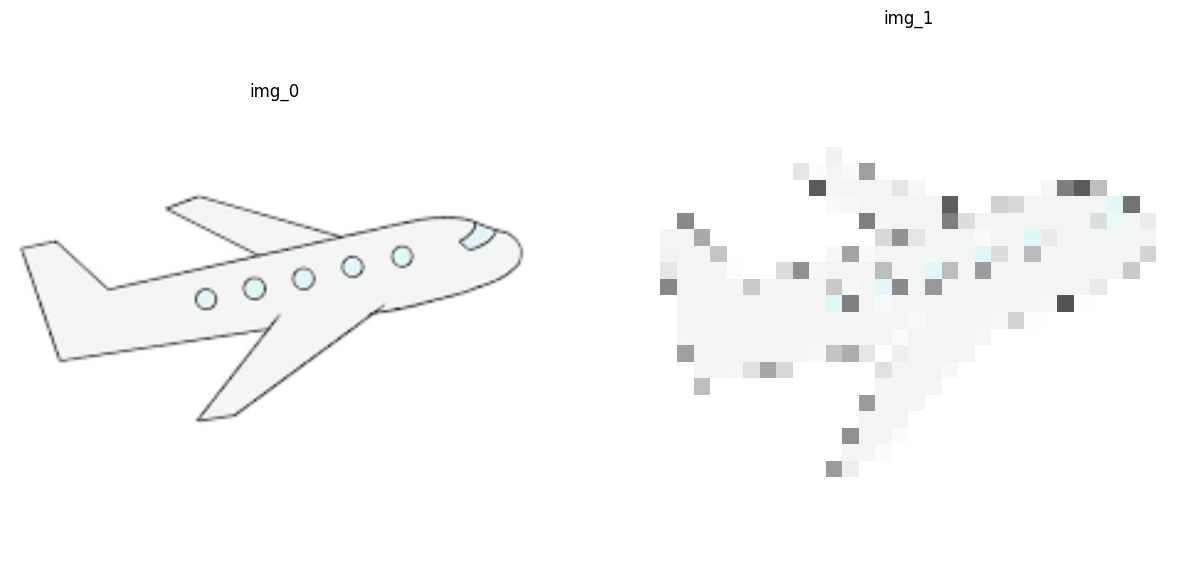

In [19]:
# Read image from the specified path and store it in img2 variable
img2 = cv2.imread('/content/drive/MyDrive/images/2.jpg', -1)

# Convert the color of the image from BGR to RGB using cvtColor() function
desired_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize the image to 32x32 pixels using resize() function
desired_image_resized2 = cv2.resize(desired_image2, (32, 32))

# Normalize the pixel values of the resized image to be between 0 and 1
# by dividing each pixel value by 255 and casting it to float32 using astype() function
desired_image_normalized2 = desired_image_resized2.astype('float32') / 255

# Add an additional dimension to the normalized image using expand_dims() function
desired_image_reshaped2 = np.expand_dims(desired_image_normalized2, axis=0)

# Use the trained model to predict the label of the input image
preds2 = model.predict(desired_image_reshaped2)

# Find the predicted label index with highest probability using argmax() function
predicted_label2 = np.argmax(preds2)

# Print the predicted label using the corresponding classes list
print("predicted as.....", classes[predicted_label2])


# Display the original and resized image side by side using show_mult_img() function
show_mult_img(1, 2, (desired_image2, desired_image_resized2))